# Classification d’images avec un CNN (Convolutional Neural Network)


#### 1- Préparation de l’environnement  

In [ ]:
#Installation des bibliothèques nécessaires 

#pip install tensorflow 
#pip install matplotlib 
#pip install numpy  

In [2]:
#Importation des bibliothèques 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random

c:\Users\ffoue\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### 2- Chargement et exploration du dataset

In [3]:
# Chargement des données MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
# Ajouter une dimension pour correspondre aux CNN (grayscale -> (28, 28, 1))
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Normalisation des images (évite de stocker en float32 inutilement)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Génération de données augmentées seulement pour l'entraînement
train_datagen = ImageDataGenerator(
    rotation_range=20,        # Rotation aléatoire jusqu'à 20°
    width_shift_range=0.2,    # Translation horizontale jusqu'à 20%
    height_shift_range=0.2,   # Translation verticale jusqu'à 20%
    shear_range=0.2,          # Cisaillement de 20%
    zoom_range=0.2,           # Zoom jusqu'à 20%
    horizontal_flip=False,    # Pas de retournement horizontal (inutile pour MNIST)
    fill_mode='nearest'       # Complète les pixels manquants
)

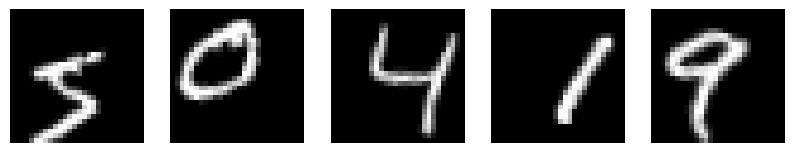

In [5]:
# Affichage de quelques images
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    augmented_image = train_datagen.random_transform(x_train[i])
    axes[i].imshow(augmented_image.squeeze(), cmap='gray')
    axes[i].axis('off')
plt.show()

####  3- Création du modèle CNN

In [6]:
# Initialisation d'un modèle de type séquentiel
classifier = Sequential()

In [7]:
# Couche de convolution adaptée aux images MNIST (1 canal)
classifier.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Ajout d'une 2e couche de convolution
classifier.add(Conv2D(64, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening (aplatit les données en 1D pour la couche Dense)
classifier.add(Flatten())

# Couches Fully Connected
classifier.add(Dense(units=128, activation="relu"))  # Couche cachée
classifier.add(Dense(units=10, activation="softmax"))  # 10 classes pour MNIST

c:\Users\ffoue\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 4- Compilation et entraînement

In [8]:
# Compiler le modèle 
classifier.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [9]:
training_set = train_datagen.flow(x_train, y_train, batch_size=32)
history = classifier.fit(
    train_datagen.flow(x_train, y_train, batch_size=32),
    validation_data=(x_test, y_test),
    epochs=5
)

Epoch 1/5
  21/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1410 - loss: 2.2752   

c:\Users\ffoue\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7112 - loss: 0.8686 - val_accuracy: 0.9597 - val_loss: 0.1219
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9277 - loss: 0.2306 - val_accuracy: 0.9791 - val_loss: 0.0662
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9483 - loss: 0.1624 - val_accuracy: 0.9823 - val_loss: 0.0566
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9584 - loss: 0.1323 - val_accuracy: 0.9781 - val_loss: 0.0691
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9621 - loss: 0.1189 - val_accuracy: 0.9847 - val_loss: 0.0462


#### 5- Évaluation du modèle

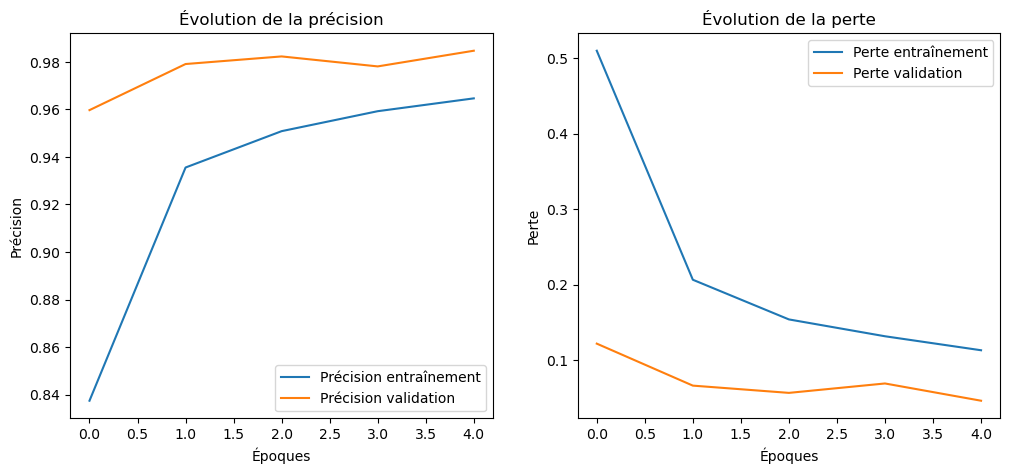

In [10]:
# Tracer les courbes de précision et de perte
plt.figure(figsize=(12, 5))

# Courbe de précision
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Précision entraînement')
plt.plot(history.history['val_accuracy'], label='Précision validation')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.title('Évolution de la précision')

# Courbe de perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.title('Évolution de la perte')

plt.show()

In [11]:
# Évaluation sur le test set
test_loss, test_acc = classifier.evaluate(x_test, y_test, verbose=2)

print(f"\nPrécision sur le test set : {test_acc * 100:.2f}%")

313/313 - 0s - 1ms/step - accuracy: 0.9847 - loss: 0.0462

Précision sur le test set : 98.47%


#### 6- Prédiction sur de nouvelles images

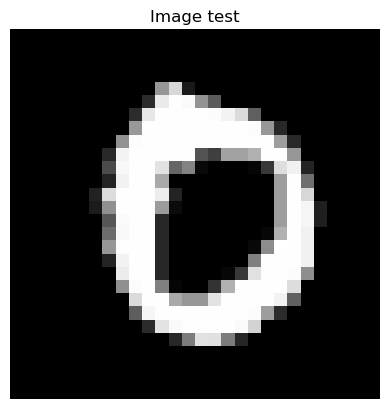

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prédiction du modèle : 0
Vraie étiquette : 0
✅ La prédiction est correcte !


In [12]:
index = random.randint(0, len(x_test))  # Sélection d'une image au hasard
test_image = x_test[index]

# Affichage de l'image
plt.imshow(test_image.squeeze(), cmap='gray')
plt.axis('off')
plt.title("Image test")
plt.show()

# Prédiction
test_image = np.expand_dims(test_image, axis=0)  # Ajouter la dimension batch
prediction = classifier.predict(test_image)
predicted_label = np.argmax(prediction)

print(f"Prédiction du modèle : {predicted_label}")
print(f"Vraie étiquette : {y_test[index]}")

# Conclusion
if predicted_label == y_test[index]:
    print("✅ La prédiction est correcte !") # l'emoji  pour la prédiction
else:
    print("❌ La prédiction est incorrecte.")

## Bonus : Améliorations possibles

#### En utilisant un modèle pré-entraînés

In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
#1 Chargement du dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Ajouter une dimension pour les CNN (1 canal -> (28, 28, 1))
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convertir MNIST (1 canal) en (3 canaux) pour MobileNetV2
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

In [15]:
#2 Définition des transformations (augmentation de données)
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,  # Pas utile pour MNIST
    preprocessing_function=preprocess_input  # Normalisation spécifique à MobileNetV2
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [16]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [17]:
# 3 Générateurs de données (chargement à la volée)
training_set = train_datagen.flow(x_train, y_train, batch_size=32)
testing_set = test_datagen.flow(x_test, y_test, batch_size=32)

In [18]:
# 4 Chargement du modèle pré-entraîné MobileNetV2
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
base_model.trainable = False  # On fige les poids du modèle

In [19]:
# 5 Construction du modèle final
model = Sequential([
    tf.keras.layers.Resizing(224, 224),  # Redimensionnement à 224x224
    base_model,
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")  # 10 classes pour MNIST
])

In [20]:
#### 5- Compilation du modèle
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [21]:
#### 6- Entraînement avec Data Augmentation
history = model.fit(training_set, validation_data=testing_set, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 505s 268ms/step - accuracy: 0.5098 - loss: 1.7804 - val_accuracy: 0.9405 - val_loss: 0.2447
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 513s 274ms/step - accuracy: 0.7087 - loss: 0.8254 - val_accuracy: 0.9519 - val_loss: 0.1788
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 560s 299ms/step - accuracy: 0.7520 - loss: 0.7182 - val_accuracy: 0.9672 - val_loss: 0.1382
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 560s 298ms/step - accuracy: 0.7642 - loss: 0.6687 - val_accuracy: 0.9592 - val_loss: 0.1645
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 567s 302ms/step - accuracy: 0.7709 - loss: 0.6596 - val_accuracy: 0.9671 - val_loss: 0.1331


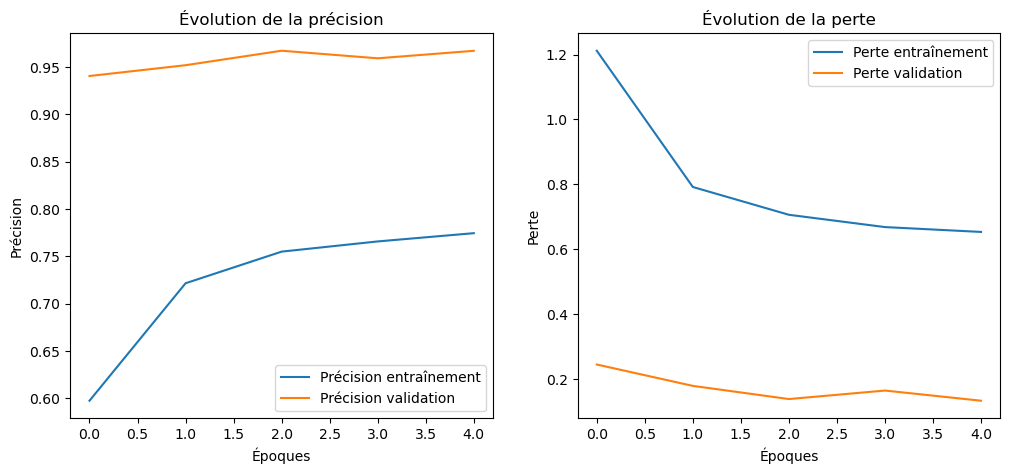

In [22]:
# 7 Visualisation des performances
plt.figure(figsize=(12, 5))

# Courbe de précision
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Précision entraînement')
plt.plot(history.history['val_accuracy'], label='Précision validation')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.title('Évolution de la précision')

# Courbe de perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.title('Évolution de la perte')

plt.show()

In [23]:
# 8 Évaluation sur le test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Précision sur le test set : {test_acc * 100:.2f}%")

313/313 - 76s - 243ms/step - accuracy: 0.5655 - loss: 2.7907

✅ Précision sur le test set : 56.55%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


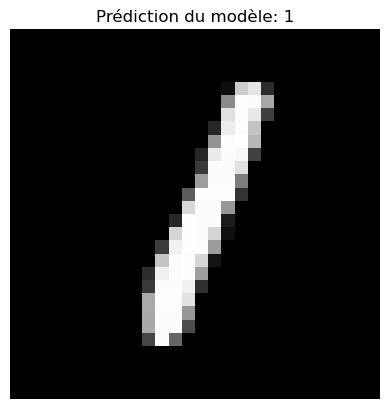

In [26]:
# 9️ Test sur une image aléatoire
import random
idx = random.randint(0, len(x_test) - 1)
test_image = x_test[idx]

# Redimensionnement
test_image_resized = tf.image.resize(test_image, (224, 224))
test_image_resized = np.expand_dims(test_image_resized, axis=0)

# Prédiction
prediction = model.predict(test_image_resized)
predicted_label = np.argmax(prediction)

# Affichage du résultat
plt.imshow(test_image.squeeze(), cmap='gray')
plt.axis('off')
plt.title(f"Prédiction du modèle: {predicted_label}")
plt.show()